In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premier-league-2022-23/2023_matchday_results.csv
/kaggle/input/premier-league-2022-23/2023_home_teams_stats.csv
/kaggle/input/premier-league-2022-23/2023_away_teams_stats.csv
/kaggle/input/premier-league-2022-23/2023_PL_standings.csv


In [2]:
standings_df = pd.read_csv("/kaggle/input/premier-league-2022-23/2023_PL_standings.csv")
results_df = pd.read_csv("/kaggle/input/premier-league-2022-23/2023_matchday_results.csv",parse_dates=['fixture.date'])
home_df = pd.read_csv("/kaggle/input/premier-league-2022-23/2023_home_teams_stats.csv")
away_df = pd.read_csv("/kaggle/input/premier-league-2022-23/2023_away_teams_stats.csv")

In [3]:
standings_df.head()

,rank,points,goalsDiff,team_id,team.name,matches_played,wins,draws,losses,goals_for,...,home_draw,home_lose,home_goals_for,home_goals_against,away,away_wins,away_draw,away_lose,away_goals_for,away_goals_against
0,1,89,61,50,Manchester City,38,28,5,5,94,...,1,1,60,17,19,11,4,4,34,16
1,2,84,45,42,Arsenal,38,26,6,6,88,...,3,2,53,25,19,12,3,4,35,18
2,3,75,15,33,Manchester United,38,23,6,9,58,...,3,1,36,10,19,8,3,8,22,33
3,4,71,35,34,Newcastle,38,19,14,5,68,...,6,2,36,14,19,8,8,3,32,19
4,5,67,28,40,Liverpool,38,19,10,9,75,...,5,1,46,17,19,6,5,8,29,30


In [4]:
results_df.columns

Index(['Unnamed: 0', 'fixture.id', 'fixture.date', 'teams.home.id',
       'teams.home.name', 'teams.home.winner', 'teams.away.id',
       'teams.away.name', 'teams.away.winner', 'goals.home', 'goals.away'],
      dtype='object')

We don't need fixture date and team name

In [5]:
results_df['teams.home.winner'].value_counts()

True     184
False    109
Name: teams.home.winner, dtype: int64

In [6]:
results_df = results_df.drop(columns=['Unnamed: 0','teams.home.name','teams.away.name'])

In [7]:
results_df[results_df['goals.home']==results_df['goals.away']]

,fixture.id,fixture.date,teams.home.id,teams.home.winner,teams.away.id,teams.away.winner,goals.home,goals.away
1,867947,2022-08-06 11:30:00+00:00,36,NaN,40,NaN,2,2
4,867950,2022-08-07 13:00:00+00:00,46,NaN,55,NaN,2,2
13,867959,2022-08-13 14:00:00+00:00,51,NaN,34,NaN,0,0
14,867960,2022-08-14 15:30:00+00:00,49,NaN,47,NaN,2,2
15,867961,2022-08-15 19:00:00+00:00,40,NaN,52,NaN,1,1
...,...,...,...,...,...,...,...,...
365,868311,2023-05-22 19:00:00+00:00,34,NaN,46,NaN,0,0
369,868315,2023-05-20 14:00:00+00:00,39,NaN,45,NaN,1,1
373,868319,2023-05-28 15:30:00+00:00,49,NaN,34,NaN,1,1
374,868320,2023-05-28 15:30:00+00:00,52,NaN,65,NaN,1,1


In [8]:
results_df.dtypes

fixture.id                         int64
fixture.date         datetime64[ns, UTC]
teams.home.id                      int64
teams.home.winner                 object
teams.away.id                      int64
teams.away.winner                 object
goals.home                         int64
goals.away                         int64
dtype: object

In [9]:
results_df['date'] = results_df['fixture.date'].apply(lambda x: x.date())
results_df['date']=pd.to_datetime(results_df['date'])

In [10]:
conditions = [
    (results_df['teams.home.winner'] == True),
    (results_df['teams.home.winner'] == False),
    (results_df['teams.home.winner'].isnull())
    ]

# create a list of the values we want to assign for each condition
values = ['home', 'away', 'draw']

results_df['full_time'] = np.select(conditions, values)

In [11]:
results_df = results_df.drop(columns=['teams.home.winner','teams.away.winner'])
results_df = results_df.rename(columns={'fixture.id':'fixture id'})
results_df.sample(5)

,fixture id,fixture.date,teams.home.id,teams.away.id,goals.home,goals.away,date,full_time
167,868113,2022-12-26 15:00:00+00:00,46,34,0,3,2022-12-26,away
110,868056,2022-10-19 18:30:00+00:00,35,41,0,1,2022-10-19,away
5,867951,2022-08-06 14:00:00+00:00,34,65,2,0,2022-08-06,home
284,868230,2023-04-01 14:00:00+00:00,52,46,2,1,2023-04-01,home
160,868106,2022-12-26 20:00:00+00:00,42,48,3,1,2022-12-26,home


In [12]:
home_df = pd.merge(home_df, away_df[['fixture id','away team id', 'away team name']], on='fixture id')
away_df = pd.merge(away_df, home_df[['fixture id','Home team id', 'Home team name']], on='fixture id')

### Joining home and away team stats table

In [13]:
home_rename = {
    'Home team id': 'team id',
    'Home team name': 'team name',
    'away team id': 'opponent id',
    'away team name': 'opponent name'
}

away_rename = {
    'away team id': 'team id',
    'away team name': 'team name',
    'Home team id': 'opponent id',
    'Home team name': 'opponent name'
}

In [14]:
home_rename_df=home_df.rename(columns=home_rename)
away_rename_df=away_df.rename(columns=away_rename)

In [15]:
home_rename_df['Home']=1
away_rename_df['Home']=0

In [16]:
match_stats_df = pd.concat([home_rename_df, away_rename_df])
match_stats_df.head()

,fixture id,team id,team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,...,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals,opponent id,opponent name,Home
0,867946,52.0,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,...,1.0,NaN,1.0,562,487,87%,NaN,42.0,Arsenal,1
1,867947,36.0,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,...,2.0,NaN,1.0,294,181,62%,NaN,40.0,Liverpool,1
2,867948,35.0,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,...,3.0,NaN,2.0,301,211,70%,NaN,66.0,Aston Villa,1
3,867949,63.0,Leeds,4.0,5.0,12,3.0,7.0,5.0,13,...,2.0,NaN,5.0,355,269,76%,NaN,39.0,Wolves,1
4,867950,46.0,Leicester,5.0,6.0,14,3.0,5.0,9.0,6,...,NaN,NaN,1.0,580,510,88%,NaN,55.0,Brentford,1


In [17]:
match_stats_df = pd.merge(match_stats_df, results_df[['fixture id','full_time','date']], on="fixture id")

In [18]:
match_stats_df = match_stats_df.fillna(0)

In [19]:
match_stats_df['Ball Possession'] = match_stats_df['Ball Possession'].str.replace('%','').astype(int)
match_stats_df['Passes %'] = match_stats_df['Passes %'].str.replace('%','').astype(int)

In [20]:
conditions = [
    ((match_stats_df['full_time'] == 'home')&(match_stats_df['Home']==1) | (match_stats_df['full_time'] == 'away')&(match_stats_df['Home']==0)),
    ((match_stats_df['full_time'] == 'home')&(match_stats_df['Home']==0) | (match_stats_df['full_time'] == 'away')&(match_stats_df['Home']==1)),
    (match_stats_df['full_time'] == 'draw')
    ]

# create a list of the values we want to assign for each condition
# 1 - Win, -1 - Loss, 0- draw
values = [1, -1, 0]

match_stats_df['result'] = np.select(conditions, values)

In [21]:
float_columns = match_stats_df.select_dtypes(include=[float]).columns
match_stats_df[float_columns] = match_stats_df[float_columns].astype(int)

In [22]:
match_stats_df.columns

Index(['fixture id', 'team id', 'team name', 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
       'Fouls', 'Corner Kicks', 'Offsides', 'Ball Possession', 'Yellow Cards',
       'Red Cards', 'Goalkeeper Saves', 'Total passes', 'Passes accurate',
       'Passes %', 'expected_goals', 'opponent id', 'opponent name', 'Home',
       'full_time', 'date', 'result'],
      dtype='object')

In [23]:
match_stats_df.shape

(760, 26)

In [24]:
print(match_stats_df['Yellow Cards'].value_counts())
print(match_stats_df['Red Cards'].value_counts())

1    208
2    206
3    134
0    127
4     58
5     22
6      4
7      1
Name: Yellow Cards, dtype: int64
0    732
1     26
2      2
Name: Red Cards, dtype: int64


In [25]:
match_stats_df = match_stats_df.drop(columns=['Red Cards'])

### Initial model 

In [26]:
match_stats_df.columns

Index(['fixture id', 'team id', 'team name', 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
       'Fouls', 'Corner Kicks', 'Offsides', 'Ball Possession', 'Yellow Cards',
       'Goalkeeper Saves', 'Total passes', 'Passes accurate', 'Passes %',
       'expected_goals', 'opponent id', 'opponent name', 'Home', 'full_time',
       'date', 'result'],
      dtype='object')

In [27]:
# Feature engineering
match_stats_df['% Shots insidebox'] = (match_stats_df['Shots insidebox'])/match_stats_df['Total Shots']
match_stats_df['% Shot accuracy'] = (match_stats_df['Shots on Goal']+match_stats_df['Blocked Shots'])/match_stats_df['Total Shots']

In [28]:
# Handpicked features (based on domain knowledge)
imp_features = ['Shots on Goal', 'Shots off Goal','Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
                'Corner Kicks', 'Ball Possession','Goalkeeper Saves', 'Total passes', 'Passes accurate','Passes %','expected_goals',
               '% Shots insidebox','% Shot accuracy']

## Pipeline

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, pred, labels):
    cm = confusion_matrix(y_test, pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=labels)
    disp.plot()
    plt.show()


def accuracy_pipeline(features_df, features):
    df = features_df[features].copy()

    df[['team id','opponent id','Home']] = features_df[['team id','opponent id','Home']]
    df['result'] = features_df['result']
    df['date'] = features_df['date']
    
    train = df[df['date']<'2023-04-28']

    X_train = train.drop(columns=['date','result'])
    y_train = train['result']

    test = df[df['date']>'2023-04-28']

    X_test = test.drop(columns=['date','result'])
    y_test = test['result']
    
    rf = RandomForestClassifier(max_depth=10, max_features=10, min_samples_split=15,
                       n_estimators=25, random_state=0)
    ovo =rf
    ovo.fit(X_train, y_train)

    train_pred = ovo.predict(X_train)
    train_acc= accuracy_score(y_train, train_pred)

    test_pred = ovo.predict(X_test)
    test_acc= accuracy_score(y_test, test_pred)

    plot_confusion_matrix(y_test, test_pred, ovo.classes_)
    
    print(f'train acc: {train_acc}, test acc: {test_acc}')
    
    results = permutation_importance(ovo, X_train, y_train, scoring='accuracy')
    important_features = results.importances_mean
    important_features_df = pd.DataFrame({'Features':X_train.columns, 'Importance': important_features})

    return {'feature importance': important_features_df}

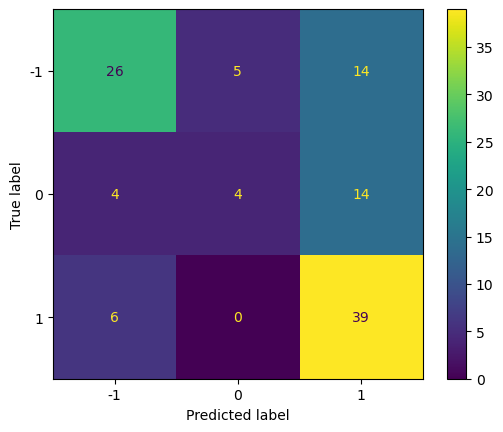

train acc: 0.8379629629629629, test acc: 0.6160714285714286


In [30]:
ans=accuracy_pipeline(match_stats_df, imp_features)

## Correlation

In [31]:
df= match_stats_df[imp_features]
df = df.fillna(0)

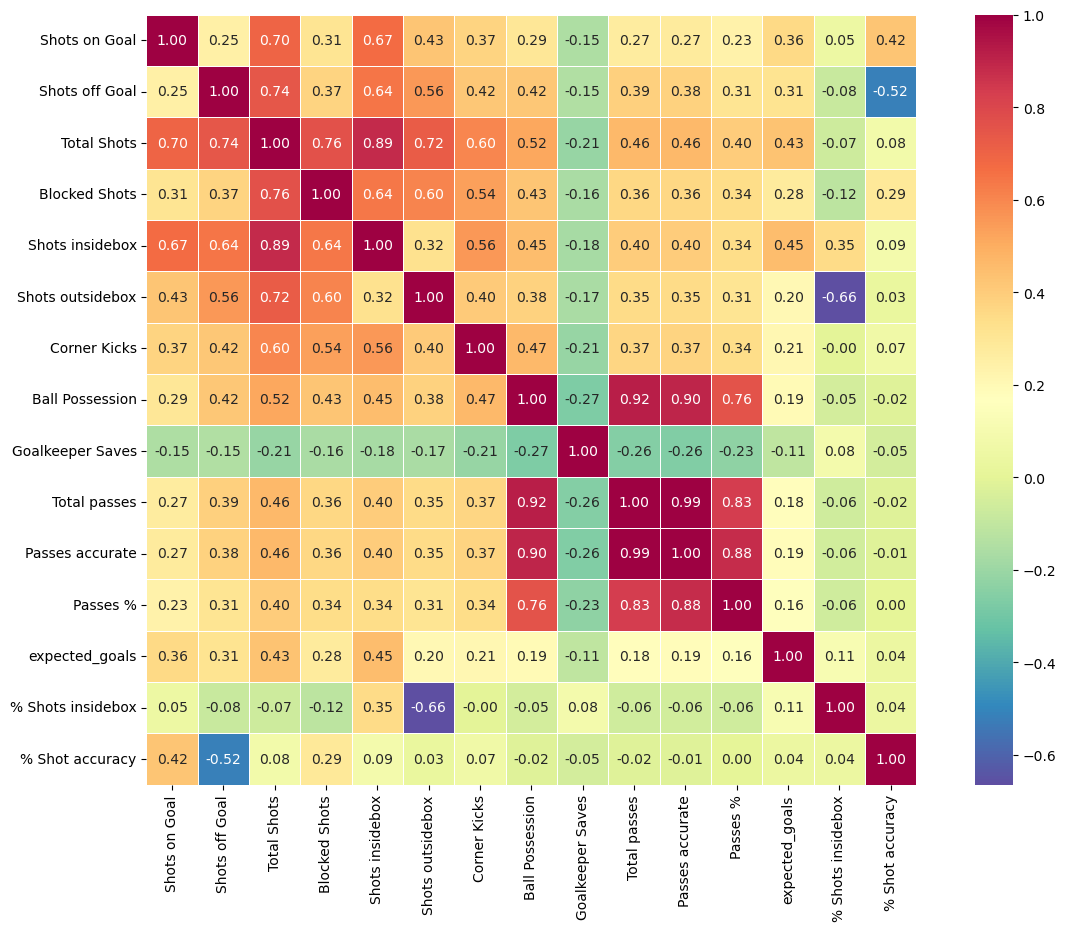

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()
plt.figure(figsize=(15,10))

hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r",
                linewidths=.5)
plt.show()

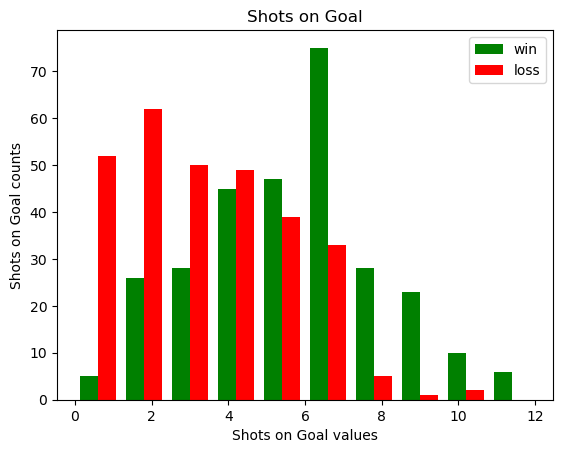

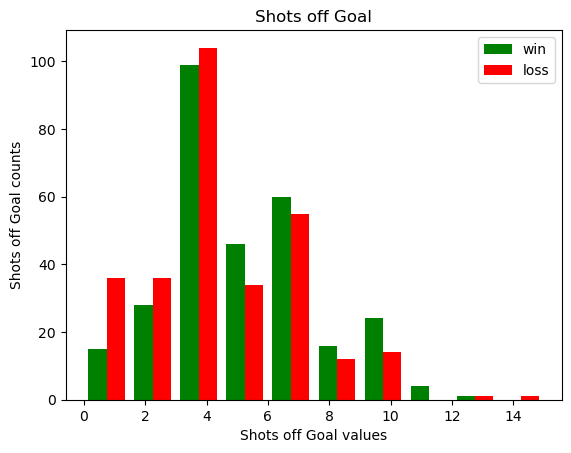

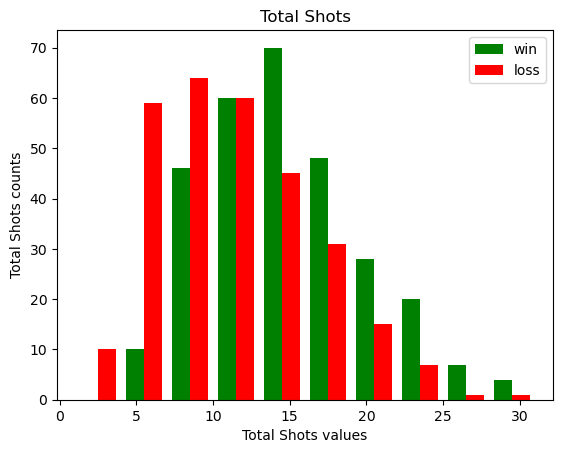

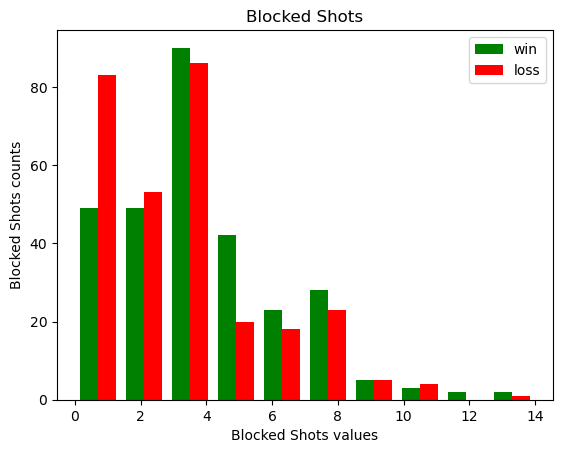

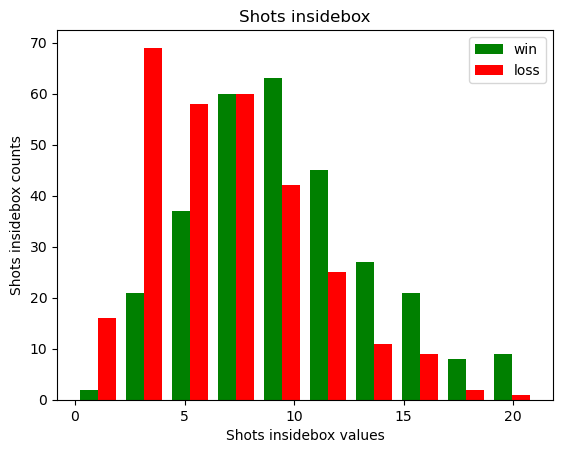

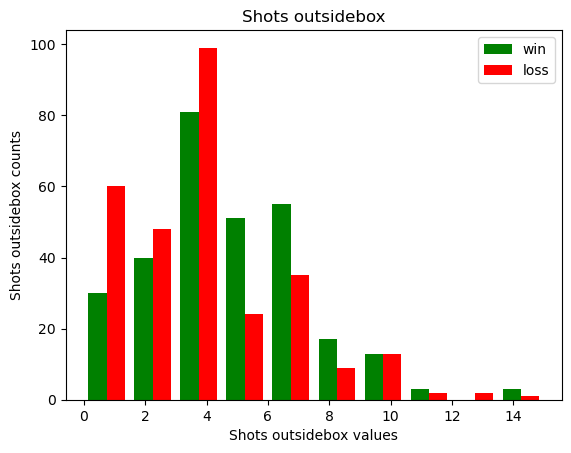

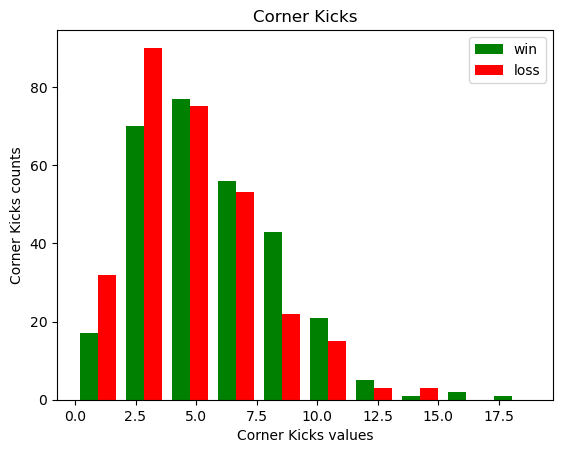

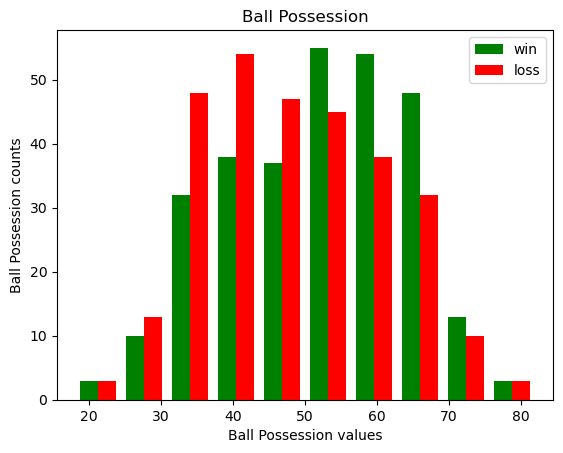

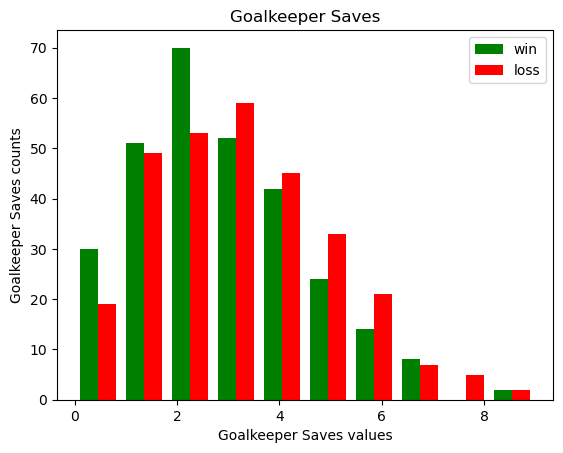

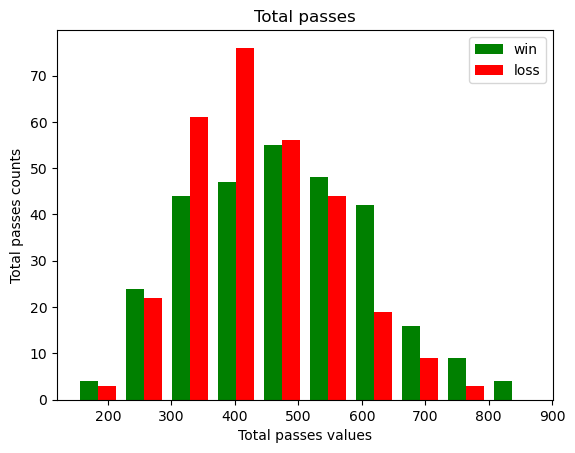

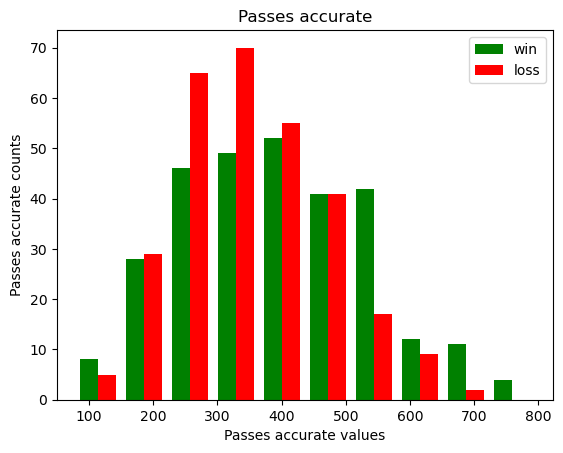

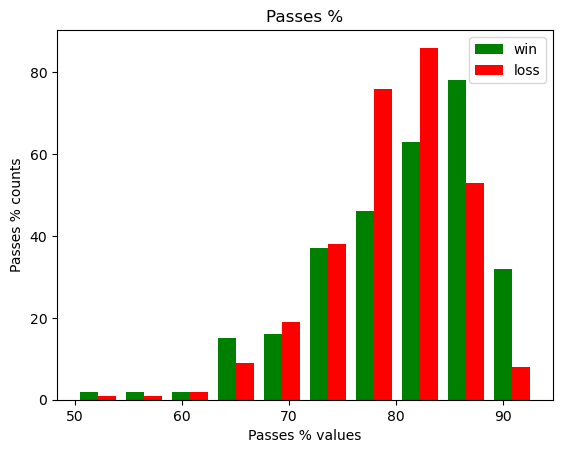

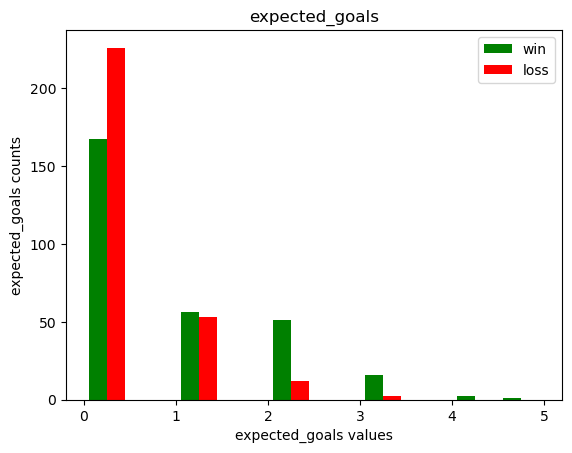

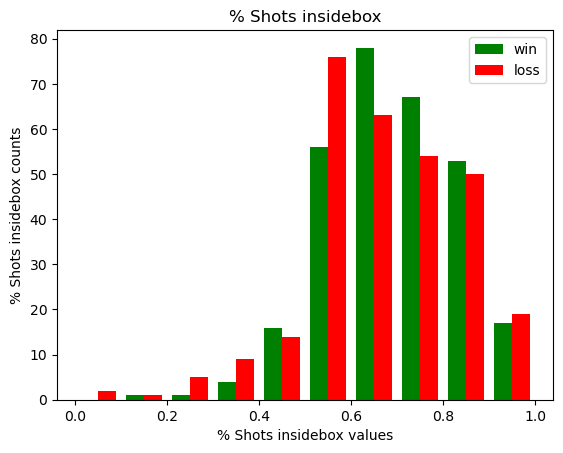

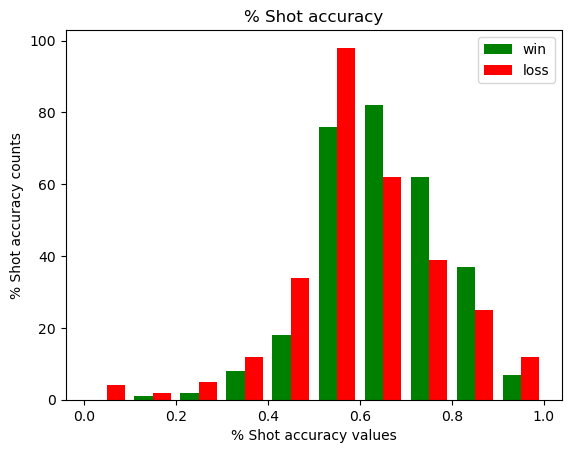

In [33]:
win_df = match_stats_df[match_stats_df['result']==1]
loss_df = match_stats_df[match_stats_df['result']==-1]

for col in df.columns:    
    plt.hist([win_df[col],loss_df[col]], color=['g','r'])
    plt.title(col)
    plt.legend(['win','loss'])
    plt.xlabel(f'{col} values')
    plt.ylabel(f'{col} counts')
    plt.show()

### Model

After finding relation between variables

In [34]:
new_imp_features = ['Shots on Goal',
 'Total Shots',
 'Ball Possession',
 'Passes %',
 'expected_goals']

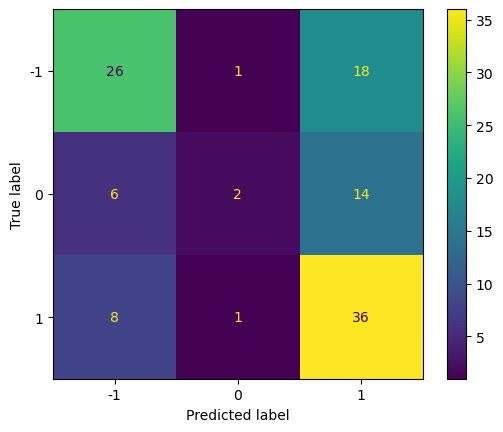

train acc: 0.8009259259259259, test acc: 0.5714285714285714


{'feature importance':           Features  Importance
 0    Shots on Goal    0.239198
 1      Total Shots    0.117284
 2  Ball Possession    0.091358
 3         Passes %    0.141667
 4   expected_goals    0.041667
 5          team id    0.091358
 6      opponent id    0.106173
 7             Home    0.039506}

In [35]:
accuracy_pipeline(match_stats_df, new_imp_features)

There isn't much improvement in accuracy 

### Self-joining the table

In [36]:
match_stats_df.columns

Index(['fixture id', 'team id', 'team name', 'Shots on Goal', 'Shots off Goal',
       'Total Shots', 'Blocked Shots', 'Shots insidebox', 'Shots outsidebox',
       'Fouls', 'Corner Kicks', 'Offsides', 'Ball Possession', 'Yellow Cards',
       'Goalkeeper Saves', 'Total passes', 'Passes accurate', 'Passes %',
       'expected_goals', 'opponent id', 'opponent name', 'Home', 'full_time',
       'date', 'result', '% Shots insidebox', '% Shot accuracy'],
      dtype='object')

In [37]:
full_match_stats_df = pd.merge(match_stats_df, match_stats_df,
                    left_on=['fixture id','opponent name'],
                    right_on=['fixture id','team name'], suffixes=("", "_away"))

### Considering opponent team features

In [38]:
opponent_imp_features = []
for i in imp_features:
    opponent_imp_features.append(i+'_away')

In [39]:
len(imp_features+opponent_imp_features)

30

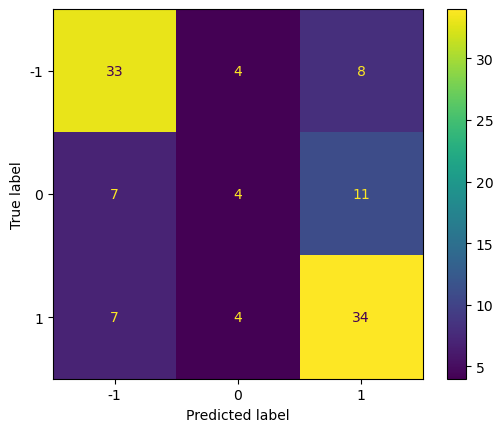

train acc: 0.9104938271604939, test acc: 0.6339285714285714


{'feature importance':                   Features  Importance
 0            Shots on Goal    0.117284
 1           Shots off Goal    0.011728
 2              Total Shots    0.028395
 3            Blocked Shots    0.010185
 4          Shots insidebox    0.029321
 5         Shots outsidebox   -0.001852
 6             Corner Kicks    0.013889
 7          Ball Possession    0.002778
 8         Goalkeeper Saves    0.070062
 9             Total passes    0.011728
 10         Passes accurate    0.021605
 11                Passes %    0.028395
 12          expected_goals    0.006481
 13       % Shots insidebox    0.014506
 14         % Shot accuracy    0.045062
 15      Shots on Goal_away    0.167593
 16     Shots off Goal_away    0.008951
 17        Total Shots_away    0.008642
 18      Blocked Shots_away    0.004321
 19    Shots insidebox_away    0.040741
 20   Shots outsidebox_away    0.006173
 21       Corner Kicks_away    0.011420
 22    Ball Possession_away    0.008333
 23   Goalkeeper S

In [40]:
accuracy_pipeline(full_match_stats_df, imp_features+opponent_imp_features)

### Subtracting the both teams data

In [41]:
df = pd.DataFrame()
for col1, col2 in zip(imp_features, opponent_imp_features):
    df[col1] = full_match_stats_df[col1]-full_match_stats_df[col2]

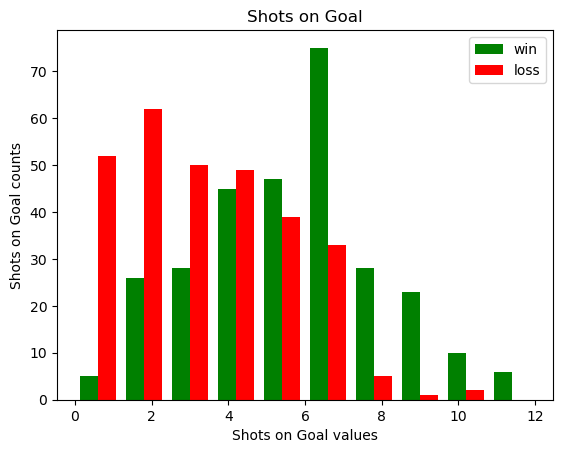

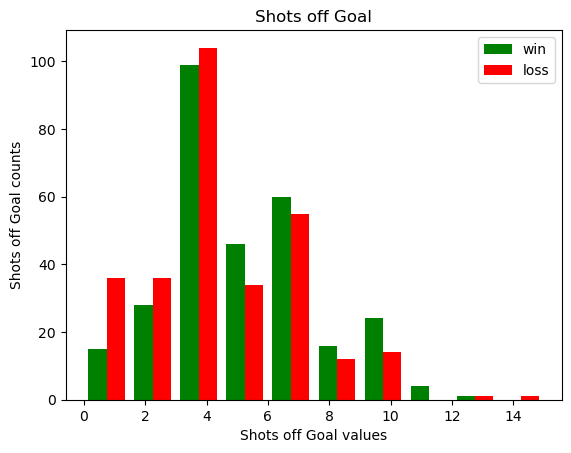

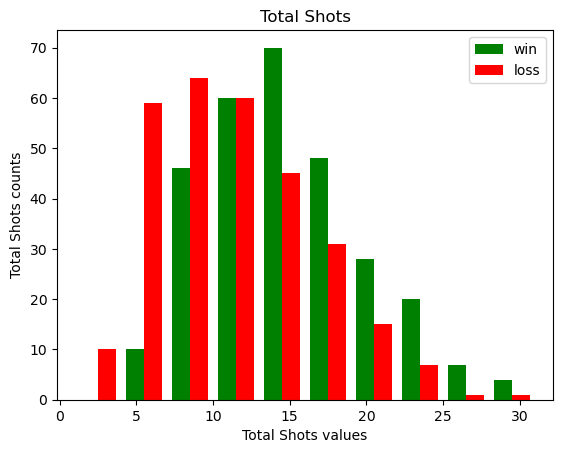

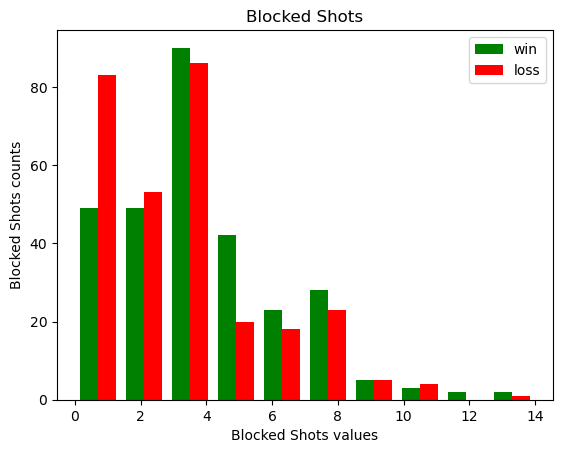

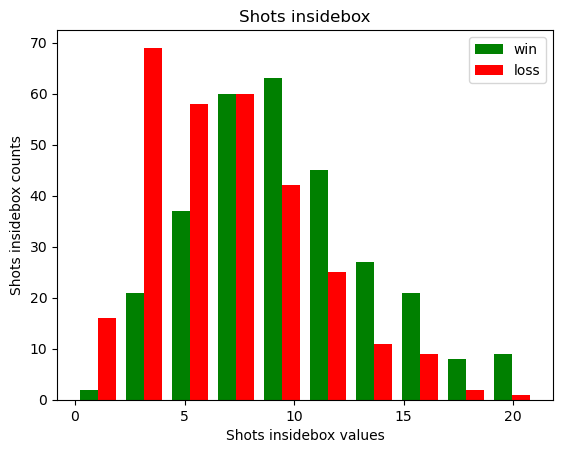

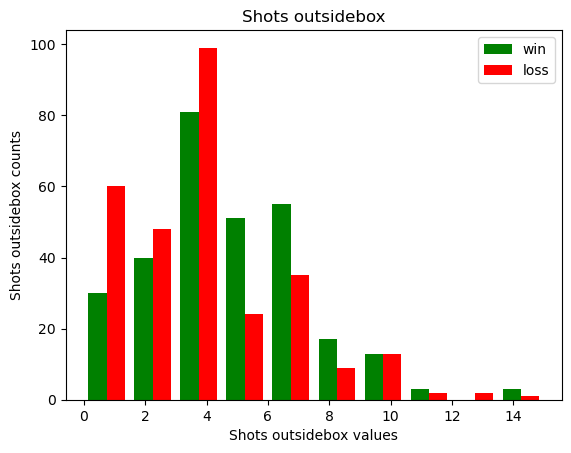

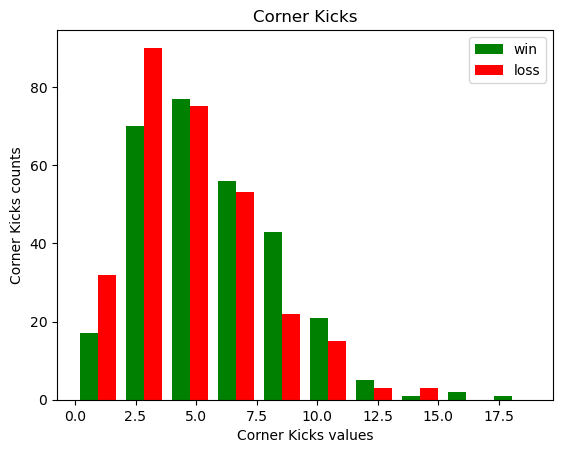

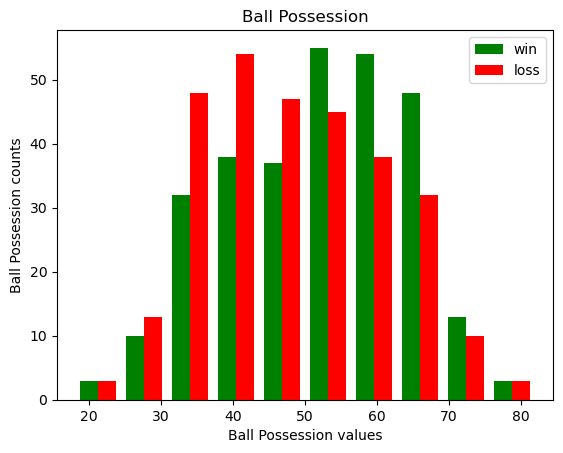

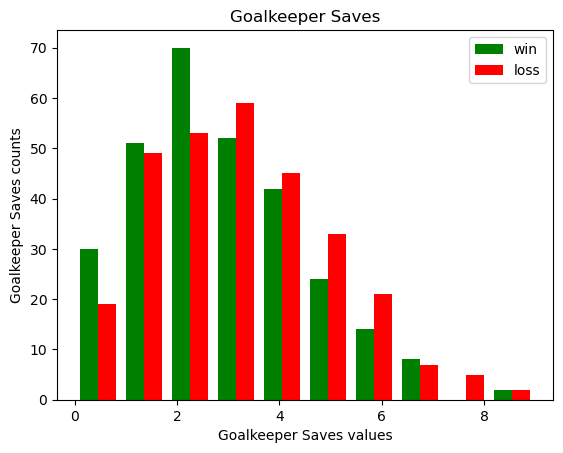

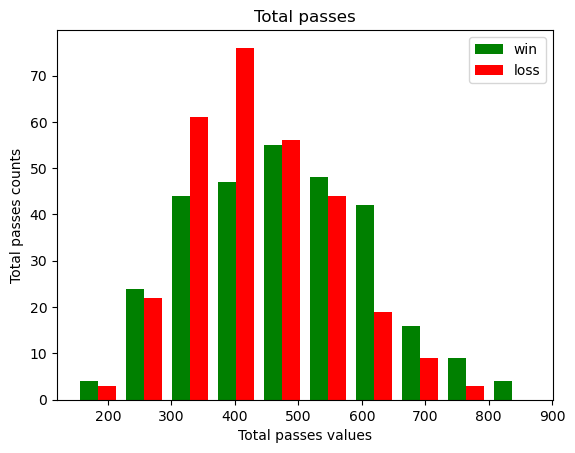

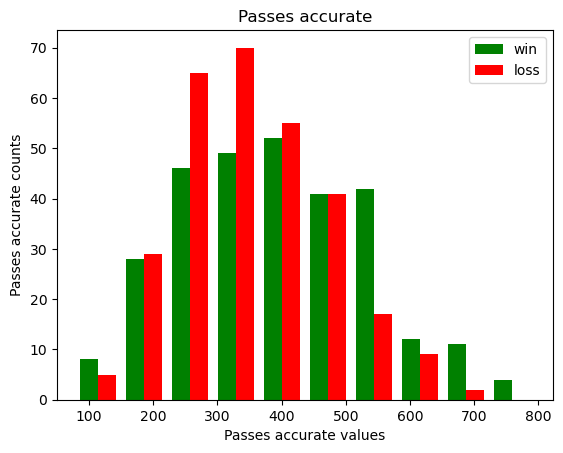

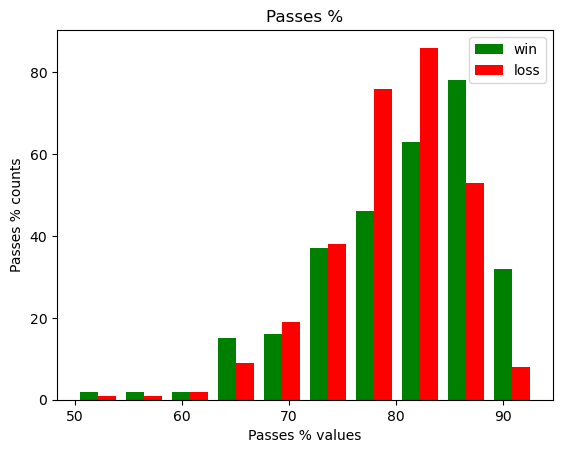

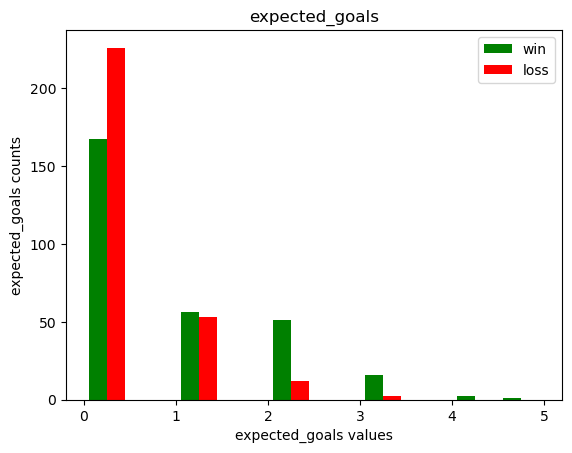

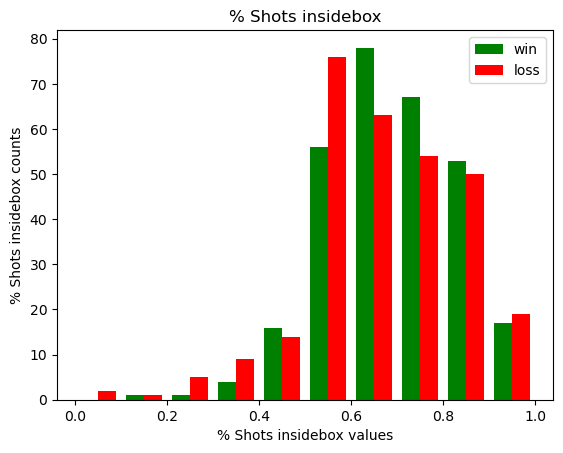

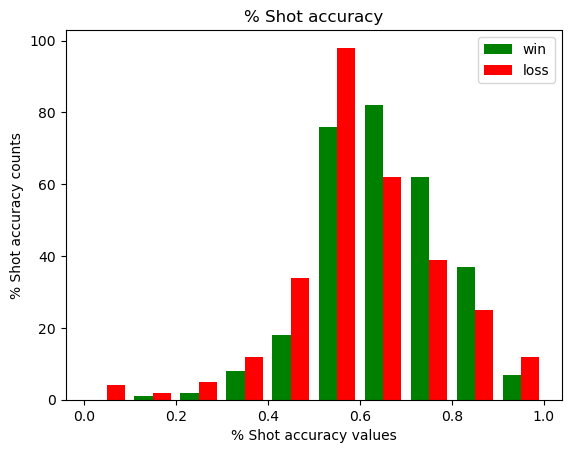

In [42]:
win_df = full_match_stats_df[full_match_stats_df['result']==1]
loss_df = full_match_stats_df[full_match_stats_df['result']==-1]

for col in df.columns:    
    plt.hist([win_df[col],loss_df[col]], color=['g','r'])
    plt.title(col)
    plt.legend(['win','loss'])
    plt.xlabel(f'{col} values')
    plt.ylabel(f'{col} counts')
    plt.show()

In [43]:
new_imp_features =  ['Shots on Goal', 'Total Shots', 'Shots insidebox','Ball Possession', 'Goalkeeper Saves',
                    'Passes %', 'expected_goals', '% Shot accuracy']

In [44]:
opponent_imp_features = []
for i in new_imp_features:
    opponent_imp_features.append(i+'_away')

In [45]:
opponent_imp_features

['Shots on Goal_away',
 'Total Shots_away',
 'Shots insidebox_away',
 'Ball Possession_away',
 'Goalkeeper Saves_away',
 'Passes %_away',
 'expected_goals_away',
 '% Shot accuracy_away']

In [46]:
df = pd.DataFrame()
for col1, col2 in zip(new_imp_features, opponent_imp_features):
    df[col1] = full_match_stats_df[col1]-full_match_stats_df[col2]

df[['team id','opponent id','Home']] = full_match_stats_df[['team id','opponent id','Home']]
df['result'] = full_match_stats_df['result']
df['date'] = full_match_stats_df['date']

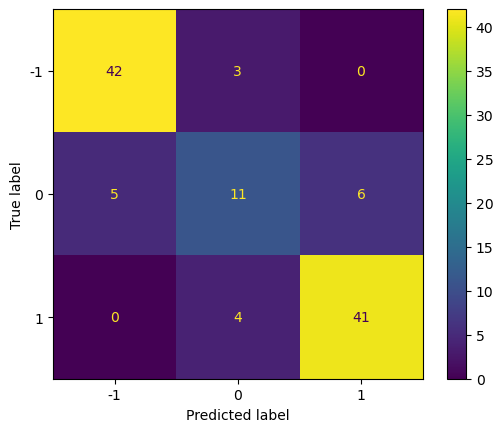

train acc: 0.8919753086419753, test acc: 0.8392857142857143


{'feature importance':             Features  Importance
 0      Shots on Goal    0.509877
 1        Total Shots    0.023148
 2    Shots insidebox    0.025000
 3    Ball Possession    0.016049
 4   Goalkeeper Saves    0.339815
 5           Passes %    0.020679
 6     expected_goals    0.005864
 7    % Shot accuracy    0.016358
 8            team id    0.022840
 9        opponent id    0.017593
 10              Home    0.001852}

In [47]:
accuracy_pipeline(df, df.columns)

### Rolling average

In [48]:
full_match_stats_df =full_match_stats_df.sort_values('date')

In [49]:
# group = full_match_stats_df.groupby('team name').get_group('Arsenal')

In [50]:
def rolling_features(cols, new_cols, df):
    df = df.sort_values('date')
    rolling_vals = df[cols].rolling(3, closed='left').mean()
    df[new_cols]=rolling_vals
    return df.dropna()

In [51]:
rolling_cols = [f'{col}_rolling' for col in new_imp_features]

In [52]:
rolling_home_df = full_match_stats_df.groupby('team name').apply(lambda x: rolling_features(new_imp_features, rolling_cols, x))

In [53]:
rolling_home_df = rolling_home_df.droplevel('team name')

In [54]:
rolling_home_df = rolling_home_df[['fixture id','team id']+new_imp_features+rolling_cols]

In [55]:
rolling_opponent_cols = [f'{col}_rolling' for col in opponent_imp_features]

In [56]:
opponent_rolling_df = full_match_stats_df.groupby('opponent name').apply(lambda x: rolling_features(opponent_imp_features, rolling_opponent_cols, x))

In [57]:
opponent_rolling_df = opponent_rolling_df.droplevel('opponent name')

In [58]:
opponent_rolling_df = opponent_rolling_df[['fixture id','team id']+opponent_imp_features+rolling_opponent_cols]

In [59]:
rolling_df = pd.merge(rolling_home_df, opponent_rolling_df, on=['fixture id','team id'])

In [60]:
rolling_df = pd.merge(rolling_df, full_match_stats_df[['fixture id','team id','result','opponent id', 'Home','date']], on=['fixture id','team id'])

In [61]:
# rolling_df['result']= full_match_stats_df['result']

### Importance of rolling features

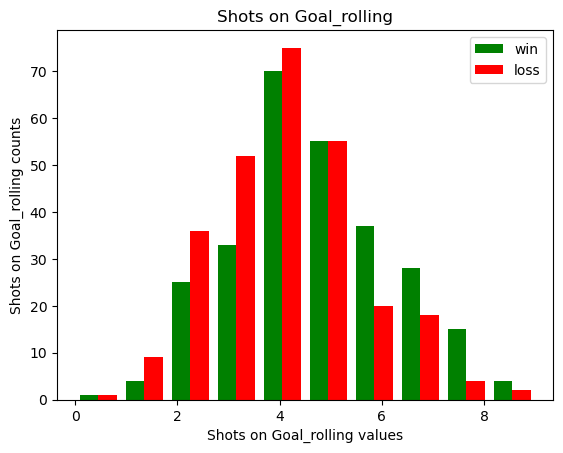

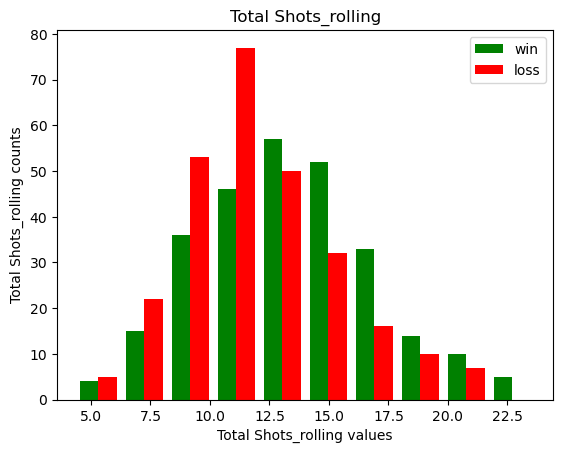

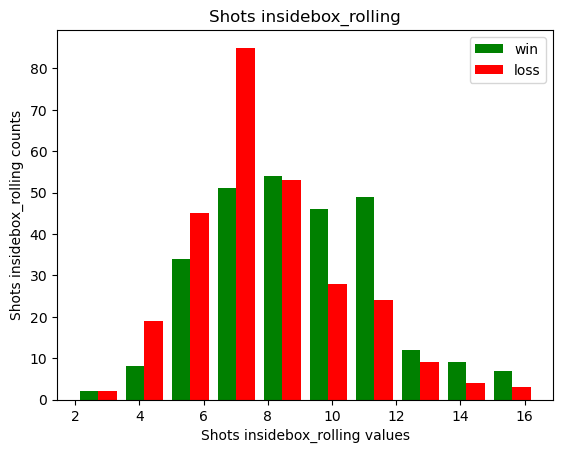

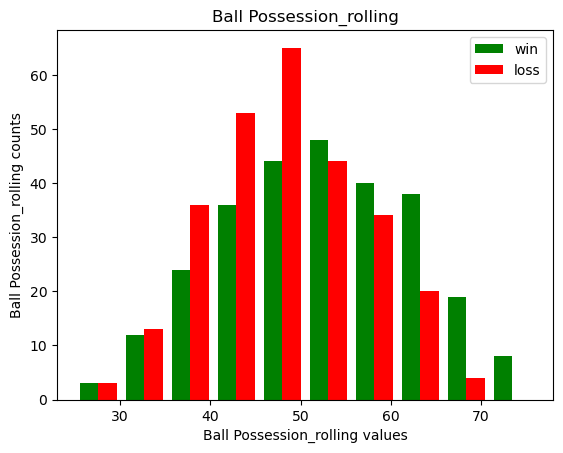

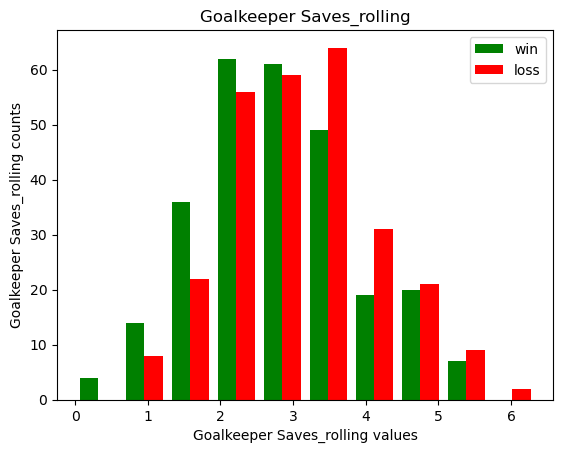

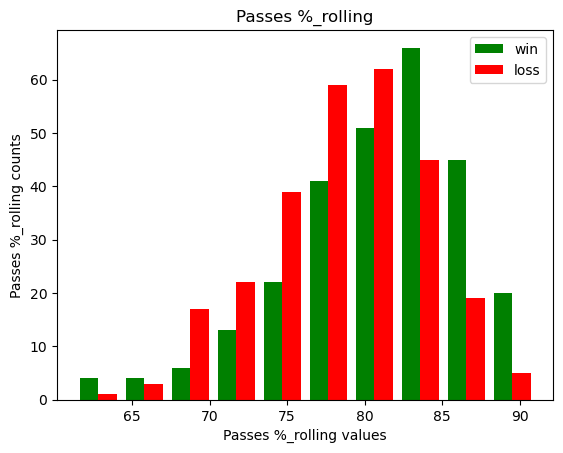

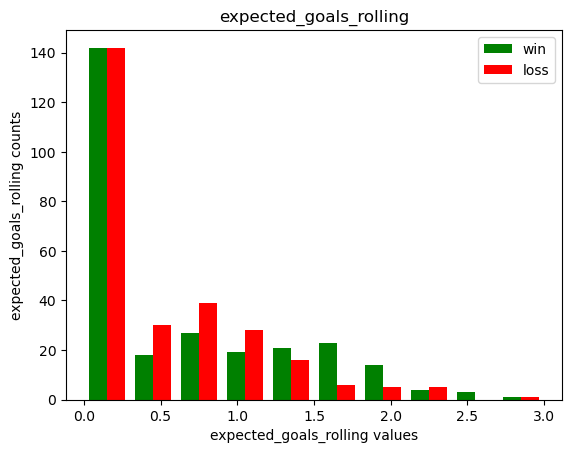

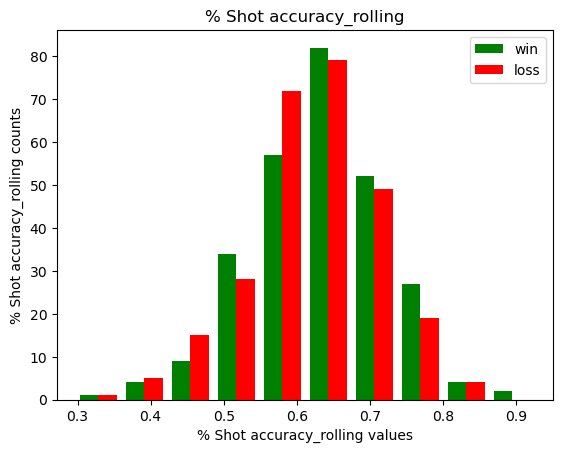

In [62]:
win_df = rolling_df[rolling_df['result']==1]
loss_df = rolling_df[rolling_df['result']==-1]

for col in rolling_cols:    
    plt.hist([win_df[col],loss_df[col]], color=['g','r'])
    plt.title(col)
    plt.legend(['win','loss'])
    plt.xlabel(f'{col} values')
    plt.ylabel(f'{col} counts')
    plt.show()

# Merge the rolling average of opponent team

In [63]:
imp_rolling_features = ['Passes %_rolling', 'Ball Possession_rolling', 'Shots on Goal_rolling', 'Total Shots_rolling']
opponent_imp_rolling_features = ['Shots on Goal_away_rolling','Total Shots_away_rolling','Ball Possession_away_rolling','Passes %_away_rolling']

In [64]:
rolling_cols

['Shots on Goal_rolling',
 'Total Shots_rolling',
 'Shots insidebox_rolling',
 'Ball Possession_rolling',
 'Goalkeeper Saves_rolling',
 'Passes %_rolling',
 'expected_goals_rolling',
 '% Shot accuracy_rolling']

In [65]:
rolling_df.columns

Index(['fixture id', 'team id', 'Shots on Goal', 'Total Shots',
       'Shots insidebox', 'Ball Possession', 'Goalkeeper Saves', 'Passes %',
       'expected_goals', '% Shot accuracy', 'Shots on Goal_rolling',
       'Total Shots_rolling', 'Shots insidebox_rolling',
       'Ball Possession_rolling', 'Goalkeeper Saves_rolling',
       'Passes %_rolling', 'expected_goals_rolling', '% Shot accuracy_rolling',
       'Shots on Goal_away', 'Total Shots_away', 'Shots insidebox_away',
       'Ball Possession_away', 'Goalkeeper Saves_away', 'Passes %_away',
       'expected_goals_away', '% Shot accuracy_away',
       'Shots on Goal_away_rolling', 'Total Shots_away_rolling',
       'Shots insidebox_away_rolling', 'Ball Possession_away_rolling',
       'Goalkeeper Saves_away_rolling', 'Passes %_away_rolling',
       'expected_goals_away_rolling', '% Shot accuracy_away_rolling', 'result',
       'opponent id', 'Home', 'date'],
      dtype='object')

In [66]:
rolling_df['date']

0     2022-08-27
1     2022-08-31
2     2022-09-04
3     2022-09-18
4     2022-10-01
         ...    
695   2023-04-29
696   2023-05-06
697   2023-05-13
698   2023-05-20
699   2023-05-28
Name: date, Length: 700, dtype: datetime64[ns]

In [67]:
df = pd.DataFrame()
for col1, col2 in zip(new_imp_features, opponent_imp_features):
    df[col1] = rolling_df[col1]-rolling_df[col2]

df[['team id','opponent id','Home']] = rolling_df[['team id','opponent id','Home']]
df['result'] = rolling_df['result']
df['date'] = rolling_df['date']

In [68]:
df[imp_rolling_features] = rolling_df[imp_rolling_features]
df[opponent_imp_rolling_features] = rolling_df[opponent_imp_rolling_features]

In [69]:
len(df.columns)

21

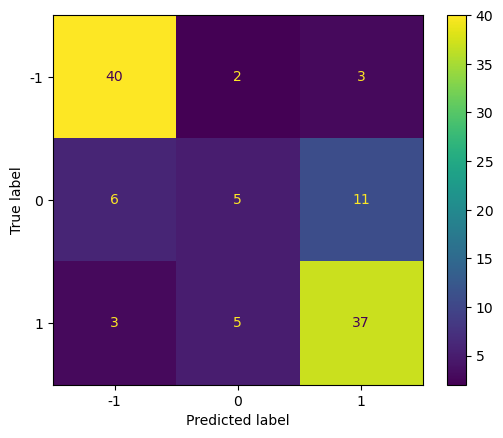

train acc: 0.9268707482993197, test acc: 0.7321428571428571


{'feature importance':                         Features  Importance
 0                  Shots on Goal    0.456463
 1                    Total Shots    0.004422
 2                Shots insidebox    0.085034
 3                Ball Possession    0.021429
 4               Goalkeeper Saves    0.277211
 5                       Passes %    0.044218
 6                 expected_goals    0.002721
 7                % Shot accuracy    0.032313
 8                        team id    0.014626
 9                    opponent id    0.018367
 10                          Home    0.000000
 11              Passes %_rolling    0.023810
 12       Ball Possession_rolling    0.011565
 13         Shots on Goal_rolling    0.010544
 14           Total Shots_rolling    0.013946
 15    Shots on Goal_away_rolling    0.009524
 16      Total Shots_away_rolling    0.011224
 17  Ball Possession_away_rolling    0.020748
 18         Passes %_away_rolling    0.028571}

In [70]:
accuracy_pipeline(df, df.columns)

### Choosing features with most accurate result

In [71]:
df = pd.DataFrame()
for col1, col2 in zip(new_imp_features, opponent_imp_features):
    df[col1] = full_match_stats_df[col1]-full_match_stats_df[col2]

df[['team id','opponent id','Home']] = full_match_stats_df[['team id','opponent id','Home']]
df['result'] = full_match_stats_df['result']
df['date'] = full_match_stats_df['date']

In [72]:
train = df[df['date']<'2023-04-28']

X_train = train.drop(columns=['date','result'])
y_train = train['result']

test = df[df['date']>'2023-04-28']

X_test = test.drop(columns=['date','result'])
y_test = test['result']

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=60, min_samples_split=15,random_state=10, max_depth=15)

In [74]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=60,
                       random_state=10)

### Hyperparameter tuning

**a) Grid Search**

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False], 'random_state': [0, 50]}
]

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=15,
                                              min_samples_split=15,
                                              n_estimators=60,
                                              random_state=10),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25], 'random_state': [0, 50]}],
             scoring='neg_mean_squared_error')

In [76]:
grid_pred = grid_search_forest.best_estimator_.predict(X_test)

In [77]:
grid_search_forest.best_estimator_

RandomForestClassifier(max_depth=10, max_features=10, min_samples_split=15,
                       n_estimators=25, random_state=0)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, grid_pred)

0.8571428571428571

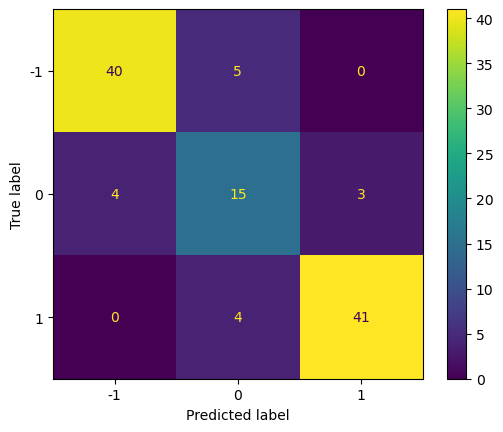

In [79]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, grid_pred, labels=grid_search_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search_forest.classes_)
disp.plot()
plt.show()

**b)  Randomized search**

In [80]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 30, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=10, max_features=5, n_estimators=25, random_state=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=5, n_estimators=25, random_state=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=5, n_estimators=10, random_state=0; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=5, n_estimators=10, random_state=0; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=5, n_estimators=10, random_state=0; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=5, n_estimators=25, random_state=0; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=5, n_estimators=25, random_state=0; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=5, n_estimators=25, random_state=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=5, n_es

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(max_depth=15,
                                                    min_samples_split=15,
                                                    n_estimators=60,
                                                    random_state=10),
                   n_iter=30, n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 50, None],
                                         'max_features': [5, 10],
                                         'n_estimators': [10, 25],
                                         'random_state': [0, 50]}],
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [81]:
random_pred = rf_random.predict(X_test)

In [82]:
accuracy_score(y_test, random_pred)

0.8571428571428571

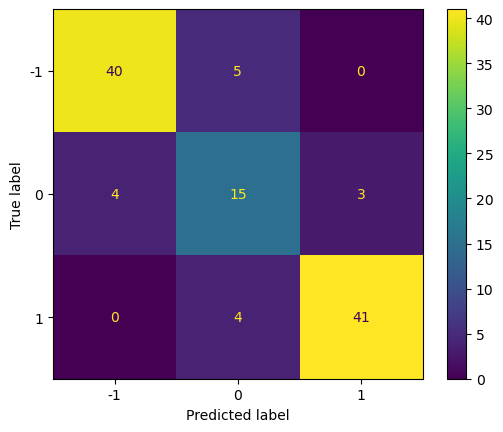

In [83]:
cm = confusion_matrix(y_test, random_pred, labels=rf_random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf_random.classes_)
disp.plot()
plt.show()

Both Grid and Randomized search are giving same answer therefore the final accuracy of our model is **0.8571**